### Exercise 1

In [3]:
E_psi = 7.3e6
E = 6894.76 * E_psi

c_ft = 150
c = 150 * 0.3048

nu = 0.2

w = 4e-3
P_net = E / ( 1 - nu**2 ) / 4 / c * w

SH_psi = 6400
SH = SH_psi * 6894.76
Sh_psi = 6300
Sh = Sh_psi * 6894.76

print(f"Pnet={P_net / 1e6} MPa")
print(f"E={E / 1e9} GPa")
print(f"c={c}m")
print(f"SH={SH/1e6} MPa")
print(f"Sh={Sh/1e6} MPa")

# Net pressure for each farcture width
w = 4e-3
P_net = E / ( 1 - nu**2 ) / 4 / c * w
print(f"w={w} => P_net={P_net/1e6:.4f}")

w = 6e-3
P_net = E / ( 1 - nu**2 ) / 4 / c * w
print(f"w={w} => P_net={P_net/1e6:.4f}")

w = 8e-3
P_net = E / ( 1 - nu**2 ) / 4 / c * w
print(f"w={w} => P_net={P_net/1e6:.4f}")

w = 4e-3
P_net = E / ( 1 - nu**2 ) / 4 / c * w
print(f"w={w} => P_net={P_net/1e6:.4f}")


Pnet=1.1467389362787985 MPa
E=50.331748 GPa
c=45.72m
SH=44.126464 MPa
Sh=43.436988 MPa
w=0.004 => P_net=1.1467
w=0.006 => P_net=1.7201
w=0.008 => P_net=2.2935
w=0.004 => P_net=1.1467


[37.28153309]
[62.35566458]
[79.30553238]
[93.25465621]


Text(0, 0.5, 'Distance of the isotropic point (m)')

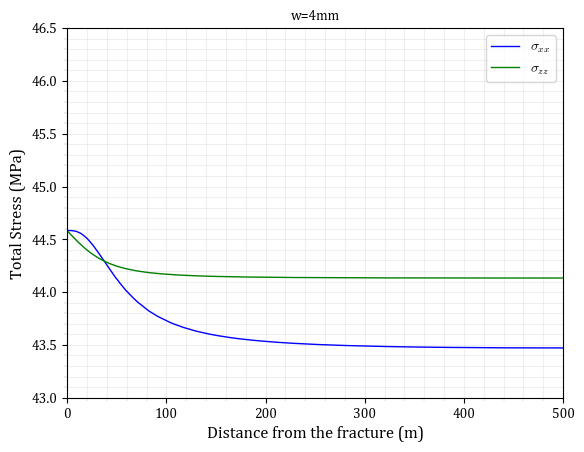

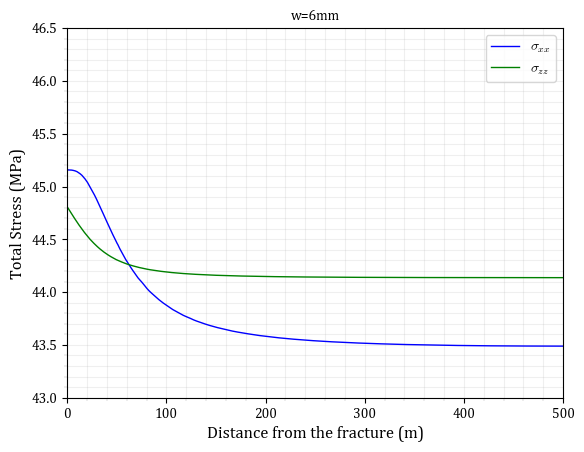

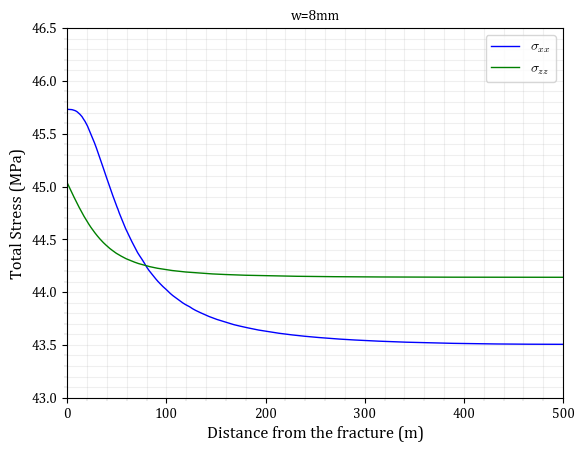

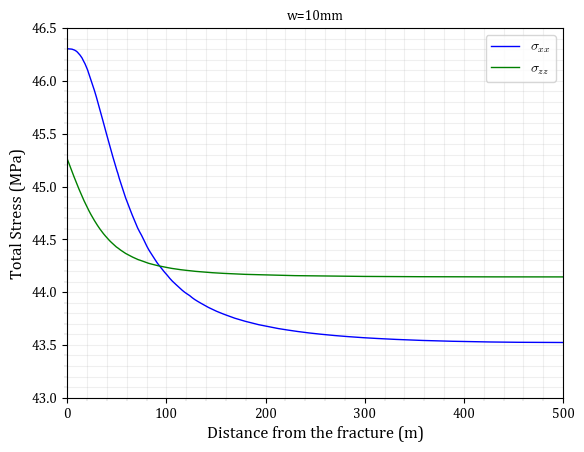

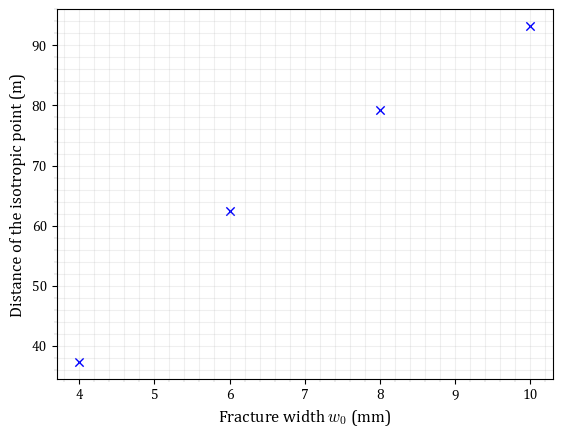

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')   ## reset!
plt.style.use('paper.mplstyle')

#
#
#
def find_xcross (df, title) :
    df['sxx_tot'] = Sh - df.sigxx
    df['sigzz'] = nu * ( df.sigxx + df.sigyy )
    df['szz_tot'] = SH - df.sigzz

    # d_syy = nu * ( d_sxx + d_szz )

    from scipy.interpolate import make_interp_spline, PPoly
    import matplotlib.pyplot as plt
    spline = make_interp_spline(df.x, df.sxx_tot - df.szz_tot, k=1) # Create a cubic spline from the data
    curve  = PPoly.from_spline(spline)     # Create a piecewise polynomial object; in essence, y = curve(x)
    width = curve.solve(y=0)
    width = width[ width > 20 ]
    df["spline"] = spline( df.x )

    fig, ax = plt.subplots()
    ax.plot( df.x, df.sxx_tot/1e6, label='$\sigma_{xx}$' )
    ax.plot( df.x, df.szz_tot/1e6, label='$\sigma_{zz}$'  )
    #ax.plot( df.x, df.szz_tot, label='$\sigma_{zz}$'  )
    ax.set_title( title )
    ax.set_xlabel("Distance from the fracture (m)") 
    ax.set_ylabel("Total Stress (MPa)") 
    ax.set_xlim(0,500)
    ax.set_ylim(43,46.5)
    ax.legend()
    
    #fig, ax = plt.subplots()
    #ax.plot( df.x, df.sxy_tot, label='sxy' )
    #ax.plot( df.x, df.szz_tot, label='szz' )
    #ax.legend()
    #fig, ax = plt.subplots()
    #ax.scatter( df.x, df.sxx_tot - df.syy_tot, label='Sxx - Syy', marker='x', alpha=0.3 )
    #ax.plot( df.x, df.spline, label='Spline', c='r' )
    
    print( width )
    return width[0]

w = [ 4, 6, 8, 10 ]
xc = []

df = pd.read_csv( "FractureCenter_w4.dat", sep=",")
xc.append ( find_xcross( df, "w=4mm" ) )

df = pd.read_csv( "FractureCenter_w6.dat", sep=",")
xc.append ( find_xcross( df, "w=6mm" ) )

df = pd.read_csv( "FractureCenter_w8.dat", sep=",")
xc.append ( find_xcross( df, "w=8mm" ) )

df = pd.read_csv( "FractureCenter_w10.dat", sep=",")
xc.append ( find_xcross( df, "w=10mm" ) )

fig, ax = plt.subplots()
ax.scatter( w, xc, marker='x' )
ax.set_xlabel("Fracture width $w_0$ (mm)") 
ax.set_ylabel("Distance of the isotropic point (m)")


## Exercise 2

In [106]:
import numpy as np

hf_ft = 170 
hf = hf_ft * 0.3048  # m

E__psi = 8.9e6 
E_ = E__psi * 6894.76   # Pa

Q_bbl_min = 50  # bbl/min
Q = 50 / 377.3884 # m3/s

mu_cp = 2   #cp
mu = 2 * 1e-3 # Pa.S

def PKN( t ) :
    global Q, E_, mu, hf
    xf = 0.524 * ( Q**3 * E_ / mu / hf**4 ) ** 0.2 * t**(4/5)
    w0 = 3.04 * ( Q**2 * mu / E_ / hf )**0.2*t**0.2
    Pnet = 1.52 * ( E_**4 * Q**2 * mu / hf**6 ) ** 0.2 * t**0.2

    return xf, w0, Pnet

In [107]:
t_hour = 1
t = 1 * 60 * 60 # sec

xf, w0, Pnet = PKN(t)

print( f"xf={xf:.2f} m" )
print( f"w0={w0*1e3:.2f} mm" )
print( f"Pnet={Pnet/1e6:.2f} MPa" )

xf=2309.33 m
w0=6.35 mm
Pnet=3.76 MPa


Text(0.5, 0, 'Time (h)')

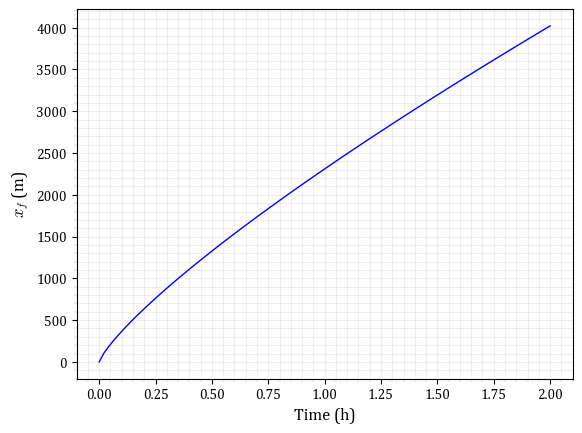

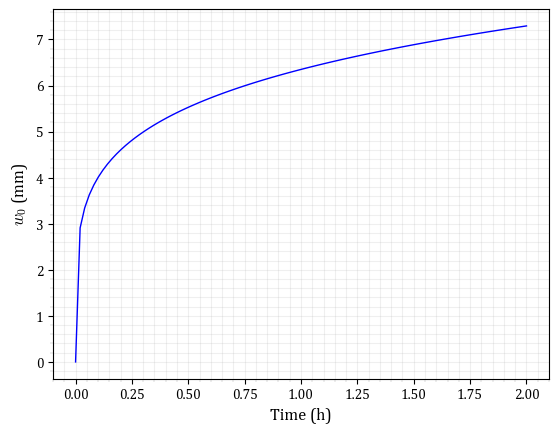

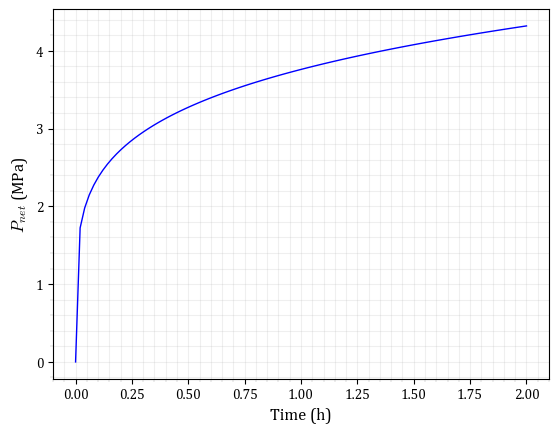

In [122]:
T = np.linspace( 0, 2*60*60, 100 ) #seconds
T_h = T/60/60

xf, w0, Pnet = PKN(T)

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')   ## reset!
plt.style.use('paper.mplstyle')

fig, ax = plt.subplots()
ax.plot(T_h,xf)
ax.set_ylabel("$x_f$ (m)")
ax.set_xlabel("Time (h)")

fig, ax = plt.subplots()
ax.plot(T_h,w0*1e3)
ax.set_ylabel("$w_0$ (mm)")
ax.set_xlabel("Time (h)")

fig, ax = plt.subplots()
ax.plot(T_h,Pnet/1e6)
ax.set_ylabel("$P_{net}$ (MPa)")
ax.set_xlabel("Time (h)")

\newpage
#### 3. What should you do to your solution in order to consider leak-off? Justify and explain briefly the algorithm to calculate $x_f$, $w_{w,0}$, and $p_n$. 

The leakoff would reduce the effective rate of fluid inside the fracture (namely, the $i$ parameter in the equation), and the energy aviailable to open the fracture.

The algorithm would probably be iterative, as the leakoff model would depend tightly on the $x_f$, $P_{net}$ and $w_0$ parameters, and vice-versa. So I believe we would need to calculate the solution by stepping, to deal with such tight coupling.


\newpage

In [18]:
with open('Fracture.edp', 'r') as file:
    data = file.read().rstrip()

print(">> --------------------------------------------------")
print(">> FreeFem++ input - Fracture.edp")
print(">> --------------------------------------------------\n\n")
print(data)

>> --------------------------------------------------
>> FreeFem++ input - Fracture.edp
>> --------------------------------------------------


load "iovtk"
//--------------------------------------------------------------------
// Dimensions
real xa = 0. ;
real xb = 500. ;  // x-size of the domain

real ya = -300. ;
real yb = 300. ;  // y-size of the domain

real xSize = xb - xa ;
real ySize = yb - ya ;

// Elastic constants
real E = 50.33e9 ;     // Young's modulus
real nu = 0.2 ;     // Poisson's ratio

real G = E/(2*(1+nu )) ; // shear modulus
real lambda = E*nu/((1+nu)*(1-2*nu)) ; // Lame constant

//Stresses
real Pfrac = 2.8668e6;

// w=0.004 => P_net=1.1467e6
// w=0.006 => P_net=1.7201e6
// w=0.008 => P_net=2.2935e6
// w=0.01 => P_net=2.8668e6

// FRACTURE
real xf = 45.72; // fracture half-length
real fw = .000; // fracture half-width

//--------------------------------------------------------------------
// First define boundaries 
border Right(t=ya, yb){x=xb;y=t;}
border Top(t=